In [3]:
import pandas as pd
import random

# Parameters for generating the dataset
num_rows = 2000
customer_names = ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Hannah"]
products = ["Product A", "Product B", "Product C", "Product D", "Product E"]
genders = ["Male", "Female"]
repeat_purchase_options = ["Yes", "No"]

# Initialize empty lists to store data
data = {
    "Customer_ID": [],
    "Customer_Name": [],
    "Gender": [],
    "Age": [],
    "Order_ID": [],
    "Product_Name": [],
    "Product_Rating": [],
    "Repeat_purchase": []
}

# Generate random data
for i in range(num_rows):
    customer_id = i + 1
    customer_name = random.choice(customer_names)
    gender = random.choice(genders)
    age = random.randint(18, 70)
    order_id = f"ORD{i+1}"
    product_name = random.choice(products)
    product_rating = round(random.uniform(1, 5), 2)
    repeat_purchase = random.choice(repeat_purchase_options)
    
    data["Customer_ID"].append(customer_id)
    data["Customer_Name"].append(customer_name)
    data["Gender"].append(gender)
    data["Age"].append(age)
    data["Order_ID"].append(order_id)
    data["Product_Name"].append(product_name)
    data["Product_Rating"].append(product_rating)
    data["Repeat_purchase"].append(repeat_purchase)

# Create a DataFrame from the generated data
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("data_mining_dataset.csv", index=False)

In [4]:
df.head()

,Customer_ID,Customer_Name,Gender,Age,Order_ID,Product_Name,Product_Rating,Repeat_purchase
0,1,Bob,Female,69,ORD1,Product A,3.98,No
1,2,Frank,Female,37,ORD2,Product D,4.43,Yes
2,3,Hannah,Male,64,ORD3,Product D,3.13,No
3,4,Eve,Male,55,ORD4,Product D,1.49,No
4,5,David,Male,20,ORD5,Product E,1.72,Yes


In [5]:
import pandas as pd
import random

# ... (previous code for generating the dataset)

# Load the generated dataset CSV into a DataFrame
df = pd.read_csv("data_mining_dataset.csv")

# Define age groups
age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ["18-29", "30-39", "40-49", "50-59", "60-70"]

# Create a new column 'Age_Group' based on the age bins
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by age group and calculate statistics
age_group_stats = df.groupby('Age_Group').agg({
    'Customer_ID': 'count',
    'Product_Rating': 'mean'
}).reset_index()

# Rename columns for clarity
age_group_stats.rename(columns={
    'Age_Group': 'Age Group',
    'Customer_ID': 'Number of Customers',
    'Product_Rating': 'Average Product Rating'
}, inplace=True)

# Print the grouped statistics
print(age_group_stats)

  Age Group  Number of Customers  Average Product Rating
0     18-29                  465                2.952989
1     30-39                  372                3.061290
2     40-49                  373                3.094745
3     50-59                  388                2.949459
4     60-70                  369                2.953930


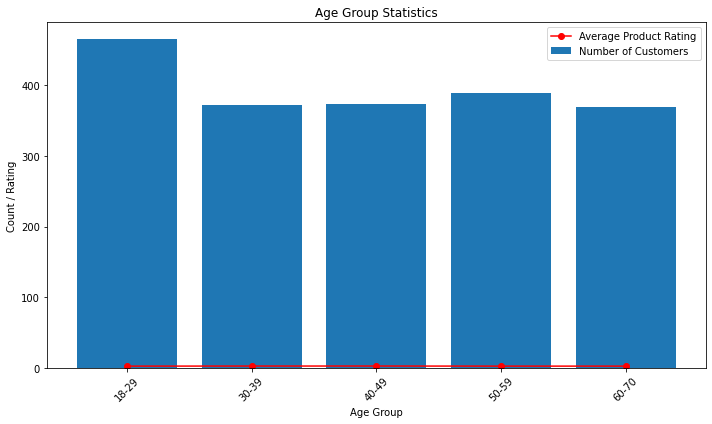

In [6]:
import matplotlib.pyplot as plt

# Plot the statistics using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_group_stats['Age Group'], age_group_stats['Number of Customers'], label='Number of Customers')
plt.plot(age_group_stats['Age Group'], age_group_stats['Average Product Rating'], marker='o', color='r', label='Average Product Rating')
plt.xlabel('Age Group')
plt.ylabel('Count / Rating')
plt.title('Age Group Statistics')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
# Perform one-hot encoding for 'Gender' and 'Repeat_purchase'
df_encoded = pd.get_dummies(df, columns=['Gender', 'Repeat_purchase'], drop_first=True)

In [8]:
df_encoded.head()

,Customer_ID,Customer_Name,Age,Order_ID,Product_Name,Product_Rating,Age_Group,Gender_Male,Repeat_purchase_Yes
0,1,Bob,69,ORD1,Product A,3.98,60-70,0,0
1,2,Frank,37,ORD2,Product D,4.43,30-39,0,1
2,3,Hannah,64,ORD3,Product D,3.13,60-70,1,0
3,4,Eve,55,ORD4,Product D,1.49,50-59,1,0
4,5,David,20,ORD5,Product E,1.72,18-29,1,1


Covariance Matrix:
                       Age  Product_Rating
Age             234.949514       -0.250031
Product_Rating   -0.250031        1.363414


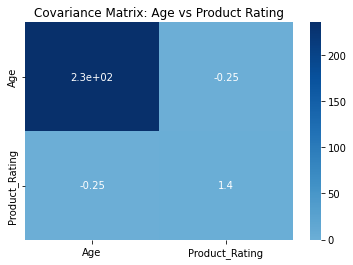

In [9]:
import seaborn as sns
# Calculate the covariance matrix
cov_matrix = df[['Age', 'Product_Rating']].cov()

# Print the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

# Visualize the covariance matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cov_matrix, annot=True, cmap='Blues', center=0)
plt.title("Covariance Matrix: Age vs Product Rating")
plt.show()

In [10]:
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Repeat_purchase'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square: 0.10288204014236031
P-value: 0.7483981073327506
Degrees of Freedom: 1
Expected Frequencies Table:
[[468.918 487.082]
 [512.082 531.918]]


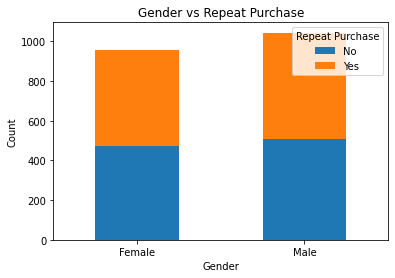

In [11]:
# Plot the results using a stacked bar plot
contingency_table.plot(kind='bar', stacked=True)
plt.title("Gender vs Repeat Purchase")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Repeat Purchase")
plt.xticks(rotation=0)
plt.show()

T-Statistic: -0.5519743295777915
P-Value: 0.5810276731525494


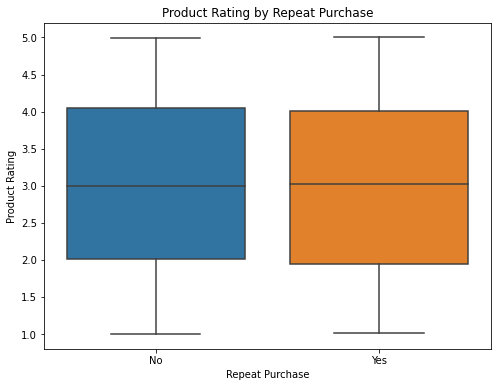

In [12]:
# Perform independent t-test
repeat_purchase_ratings = df[df['Repeat_purchase'] == 'Yes']['Product_Rating']
no_repeat_purchase_ratings = df[df['Repeat_purchase'] == 'No']['Product_Rating']

t_statistic, p_value = stats.ttest_ind(repeat_purchase_ratings, no_repeat_purchase_ratings)

# Print the t-test results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Visualize the results using box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Repeat_purchase'], y=df['Product_Rating'])
plt.title("Product Rating by Repeat Purchase")
plt.xlabel("Repeat Purchase")
plt.ylabel("Product Rating")
plt.show()

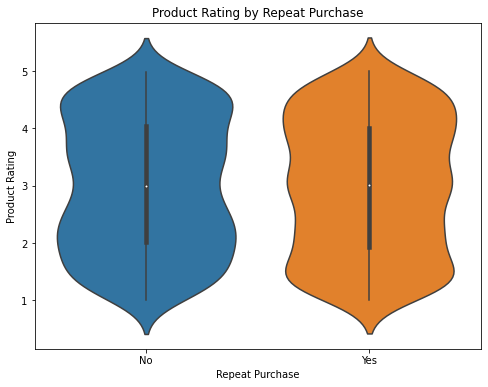

In [13]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Repeat_purchase'], y=df['Product_Rating'])
plt.title("Product Rating by Repeat Purchase")
plt.xlabel("Repeat Purchase")
plt.ylabel("Product Rating")
plt.show()